<h3><span style="color:DodgerBlue">Udemy - Python for Data Science and Machine Learning Bootcamp</span></h3>
<h3><span style="color:DodgerBlue">Instructor: Jose Portilla, Head of Data Science, Pierian Data Inc.</span></h3>
<h2><span style="color:DarkBlue">911 Calls Capstone Project</span></h2>

<span style="color:green">Note: Green markdown is edits I have made to the instructor's markdown</span>  
For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title <span style="color:green">Dept:Reason - I believe instructor reversed these, but I am going back through this to correct it</span>
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!<br /><span style="color:green">I have removed most of the task markdowns and changed them to python comments to save space in this notebook</span>

<h3><span style="color:DarkBlue">Data and Setup</span>

In [8]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [63]:
# Import visualization libraries and set %matplotlib inline, etc.
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
%config Completer.use_jedi = False # to fix tab completion not working

In [27]:
# Read in the csv file as a dataframe called df
df = pd.read_csv('911.csv')

In [28]:
# Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [29]:
# Check the head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<h3><span style="color:DarkBlue">Basic Questions</span>

In [30]:
# What are the top 5 zipcodes for 911 calls?
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [31]:
# What are the top 5 townships (twp) for 911 calls?
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [32]:
# Take a look at the "title" column. How many unique title codes are there?
df['title'].nunique()

110

<h3><span style="color:DarkBlue">Creating new features</span>

In [33]:
# The Title column contains "DEPARTMENT/REASON". The departments are EMS, Fire, and 
# Traffic. Use .apply() with a custom lambda expression to create a new column called 
# "Dept" that contains this string value.
# For example, if the Title column value is EMS:BACK PAINS/INJURY, the Dept column value 
# would be EMS.

df['Dept'] = df['title'].apply(lambda x: x.split(':')[0])

In [34]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [35]:
# What is the most common Dept for a 911 call based off of this new column?
df['Dept'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Dept, dtype: int64

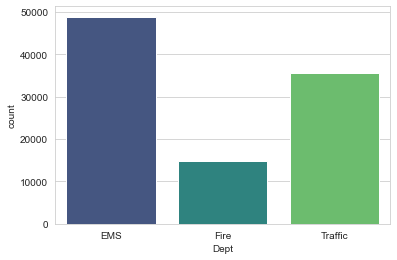

In [36]:
# Now use Seaborn to create a countplot of 911 calls by Dept.
sns.countplot(x=df['Dept'],palette='viridis')

In [46]:
# Now let us begin to focus on time information. What is the data type of the objects
# in the timeStamp column?
type(df['timeStamp'].iloc[1])

str

In [47]:
# You should have seen that these timestamps are still strings. Use pd.to_datetime to 
# convert the column from strings to DateTime objects.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [65]:
# You can now grab specific attributes from a DateTime object by calling them
time = df['timeStamp'].iloc[0]
time.hour

17

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [52]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [55]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [56]:
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [58]:
# Notice how the Day of Week is an integer 0-6. Use .map() with this dictionary to map the
# actual string names to the days of the week:
# dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [59]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [60]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [61]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


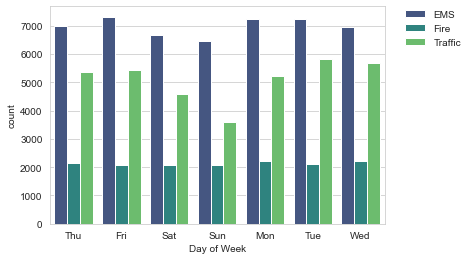

In [66]:
# Now use Seaborn to create a countplot of the Day of Week column with the hue based off
# of the Dept column.
sns.countplot(x=df['Day of Week'], hue=df['Dept'],palette='viridis')
# Move legend outside of grid so it doesn't obscure the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

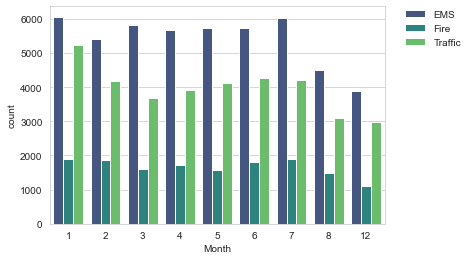

In [67]:
# Now do the same for Month
sns.countplot(x=df['Month'], hue=df['Dept'],palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

In [78]:
# Now create a groupby object called byMonth, where you group the DataFrame by the month column
# and use the count() method for aggregation. Use the head() method on this returned DataFrame
byMonth = df.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


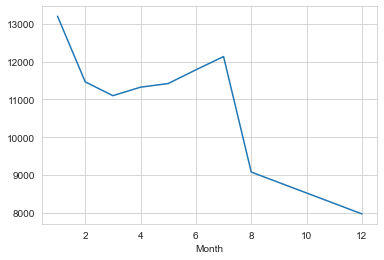

In [79]:
# Now create a simple plot off of the dataframe indicating the count of calls per month
byMonth['lat'].plot()

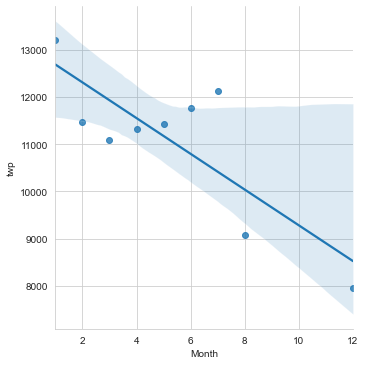

In [86]:
# Now see if you can use Seaborn's lmplot() to create a linear fit on the number of calls per
# month. Keep in mind you may need to reset the index to a column
sns.lmplot(data=byMonth.reset_index(),x='Month',y='twp')

In [88]:
# Create a new column called 'Date' that contains the date from the timeStamp column. You'll 
# need to use apply along with the .date() method
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [89]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [92]:
# Now groupby this Date column with the count() aggregate and create a plot of counts of 911
# calls
# I did this in two steps so I could check the counts before plotting
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

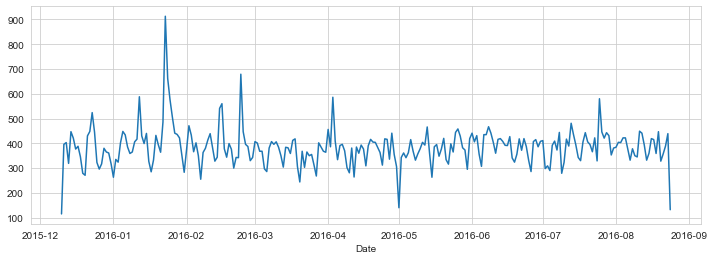

In [109]:
# matplotlib method
df.groupby('Date').count()['lat'].plot(figsize=(12,4))
plt.tight_layout

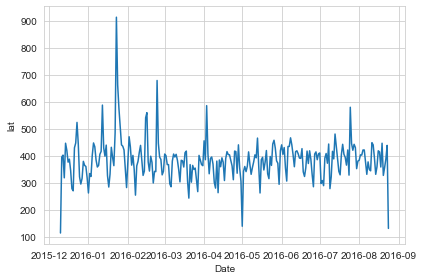

In [94]:
# Seaborn method
sns.lineplot(data=byDate,x='Date',y='lat')
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Dept for the 911 call**

In [95]:
# Did this again in two steps so I could check counts before plotting
byDateTraffic = df[df['Dept']=='Traffic'].groupby('Date').count()
byDateTraffic.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186


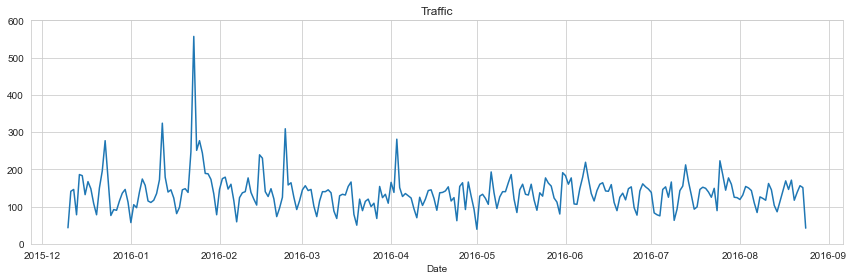

In [112]:
#sns.lineplot(data=byDateTraffic,x='Date',y='desc') - alternate plot using Seaborn
byDateTraffic.reset_index().plot(x='Date',y='lat',title='Traffic',legend=False,figsize=(12,4))
plt.ylim(0,600) # added this so the three plots can be compared easily
plt.tight_layout()

In [102]:
# Did this again in two steps so I could check counts before plotting
byDateFire = df[df['Dept']=='Fire'].groupby('Date').count()
byDateFire.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39


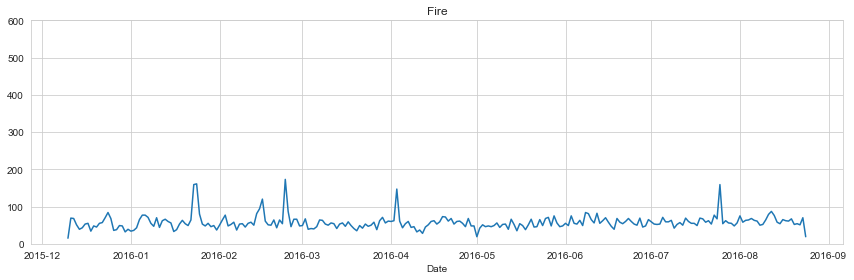

In [113]:
byDateFire.reset_index().plot(x='Date',y='lat',title='Fire',legend=False,figsize=(12,4))
plt.ylim(0,600)
plt.tight_layout()

In [104]:
# Did this again in two steps so I could check counts before plotting
byDateEMS = df[df['Dept']=='EMS'].groupby('Date').count()
byDateEMS.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222


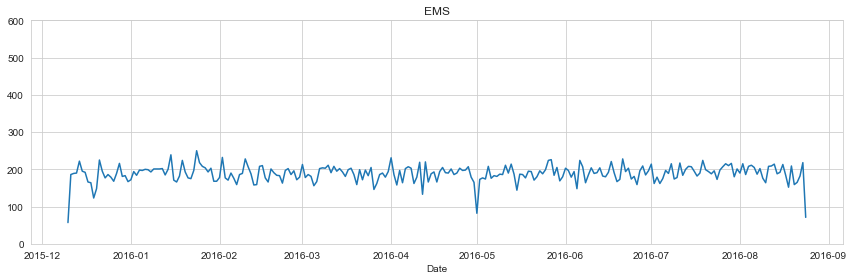

In [121]:
byDateEMS.reset_index().plot(x='Date',y='lat',title='EMS',legend=False,figsize=(12,4))
plt.ylim(0,600)
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [44]:
byDoW = df.groupby('Day of Week').count()

In [45]:
byDoW.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Date
Day of Week,,,,,,,,,,,,,
Fri,14833,14833,14833,12887,14833,14833,14830,14758,14833,14833,14833,14833,14833
Mon,14680,14680,14680,12763,14680,14680,14674,14627,14680,14680,14680,14680,14680
Sat,13336,13336,13336,11612,13336,13336,13330,13234,13336,13336,13336,13336,13336
Sun,12136,12136,12136,10558,12136,12136,12130,12095,12136,12136,12136,12136,12136
Thu,14478,14478,14478,12580,14478,14478,14474,14408,14478,14478,14478,14478,14478


In [122]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Dept'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


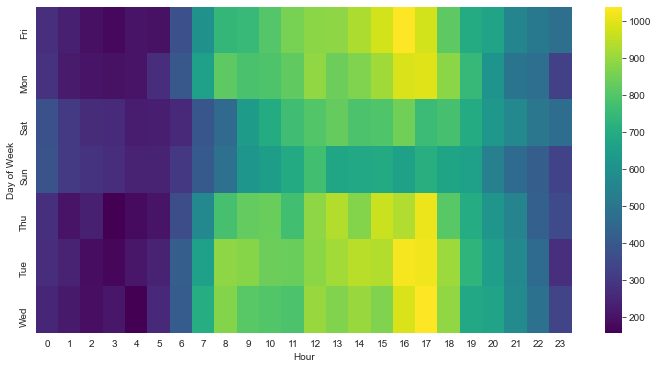

** Now create a clustermap using this DataFrame. **

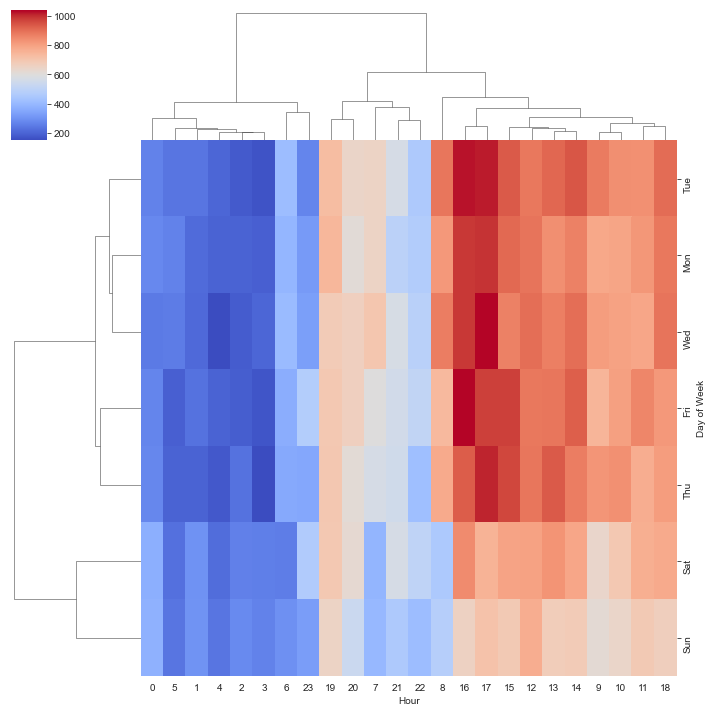

In [124]:
# Now create a clustermap using this DataFrame
sns.clustermap(data=dayHour,cmap='coolwarm')

In [125]:
# Now repeat these same plots and operations for a DataFrame that shows the month as the column
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Dept'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


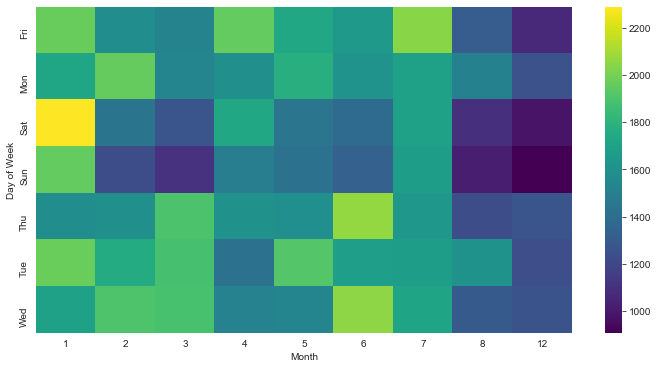

In [126]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayMonth,cmap='viridis')

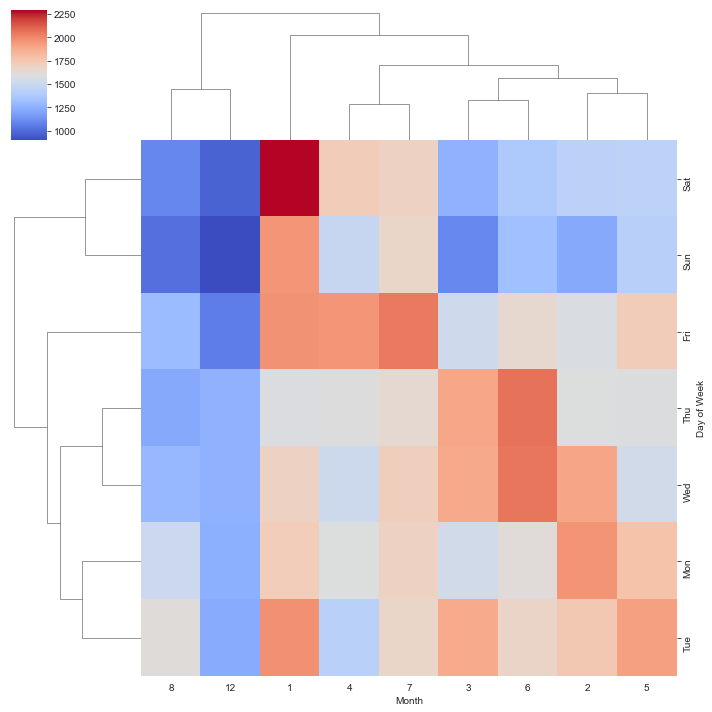

In [127]:
sns.clustermap(data=dayMonth,cmap='coolwarm')

**Continue exploring the Data however you see fit!**
# Great Job!